### Function to generate random Lindblad evolution w noise

In [1]:
using LinearAlgebra
using Plots

function rand_dm(n)
    # return a random density matrix
    ρ = -1 .+ 2 * rand(n, n) 
    ρ += im * (-1 .+ 2 * rand(n, n))  
    ρ = ρ * ρ'
    Hermitian(ρ / tr(ρ))
end

function rand_herm(n)
    # return a random hermitian matrix
    h = -1 .+ 2 * rand(n, n)
    h += im *(-1 .+ 2 *  rand(n, n))
    h = 0.5 * (h + h')
    Hermitian(h)
end

function bloch(ρ_list::Matrix{ComplexF64})
    # Pauli matricies
    σ = [ [0 1; 1 0], [0 -im; im 0], [1 0; 0 -1], [1 0; 0 1] ]   
    bloch_vec = [real(tr(σ[i] * ρ_list[t])) for i=1:3]
end

function bloch(ρ_list::Vector{Matrix{ComplexF64}})
    # Pauli matricies
    σ = [ [0 1; 1 0], [0 -im; im 0], [1 0; 0 -1], [1 0; 0 1] ]
    time_steps = length(ρ_list)
    bloch_vec = zeros(3, time_steps)
    for t in 1:time_steps
        bloch_vec[:, t] = [real(tr(σ[i] * ρ_list[t])) for i=1:3]
    end
    bloch_vec
end


(process:22964): GLib-GIO-WARNING **: 11:09:22.887: Unexpectedly, UWP app `Microsoft.MSPaint_6.2203.1037.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.MSPaint_8wekyb3d8bbwe!Microsoft.MSPaint') supports 17 extensions but has no verbs


bloch (generic function with 2 methods)

In [2]:
using Random
using QuantumOptics

function rand_Linblad_w_noise(seed, w, t_list) 
    # seed - to generate reproducable system,
    # w - noise level
    
    basis = NLevelBasis(2) # define 2-level basis
    
    Random.seed!(seed)    
    
    ρ₀ = DenseOperator(basis, rand_dm(2))  # initial state density matrix
    H = DenseOperator(basis, rand_herm(2)) # Hamiltonian of the system
    J = DenseOperator(basis, randn(2, 2) + 1im*randn(2, 2)) # Lindblad decipator  was rand
    
    evol = timeevolution.master(t_list, ρ₀, H, [J])
    time = evol[1]
    ρ_exact = evol[2];

    ρ = [ (1 - w) * ρₜ.data + w * rand_dm(2) for ρₜ in ρ_exact ];

end

rand_Linblad_w_noise (generic function with 1 method)

Lets generate and plot evolutuion of the Bloch vector using the function declared above 

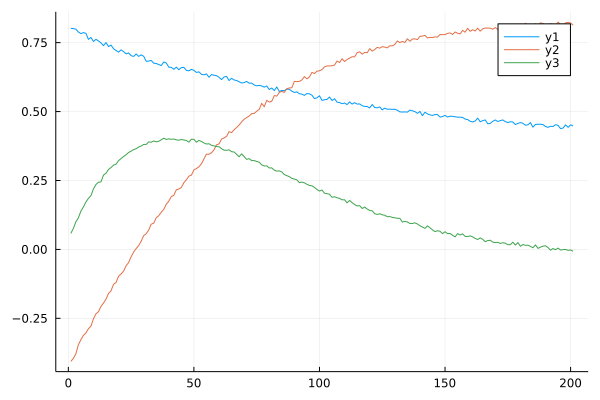

In [7]:
tₘₐₓ = 2.0 # maximum time 
Δt = 0.01     # time step
tlist = [0:Δt:tₘₐₓ;] # time span


ρ = rand_Linblad_w_noise(100, 0.01, tlist) 

bv = bloch(ρ)

plot(bv')